`palettecleanser` is a python library that allows single line conversions between images and colormaps for data visualization. `palettecleanser` supports `matplotlib`, `seaborn`, and `plotly` libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Introduction

In [2]:
from palettes import Palette

`palettecleanser` reads files into a native `Palette` object. This handles the parsing and extraction of colors into colormaps.

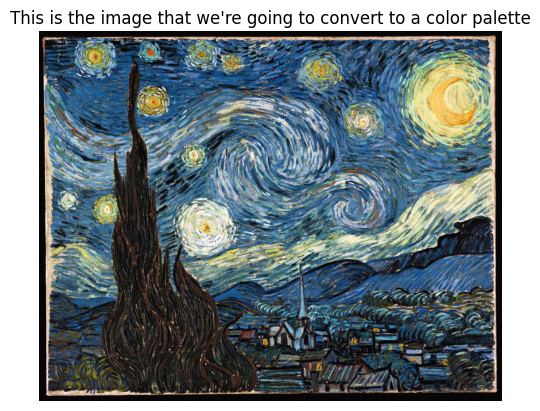

In [3]:
fname = 'vangogh.jpg'
plt.imshow(plt.imread(f'images/{fname}'))
plt.title("This is the image that we're going to convert to a color palette")
plt.axis('off')
plt.show()

To convert to a colormap, load the image into a `Palette` object. The `Palette` object enables displaying of all generatable colormaps via. the `display_all_palettes` method. 

Attributes such as numbers of colors generated (`n_colors`) can be adjusted via. the class initialization call.

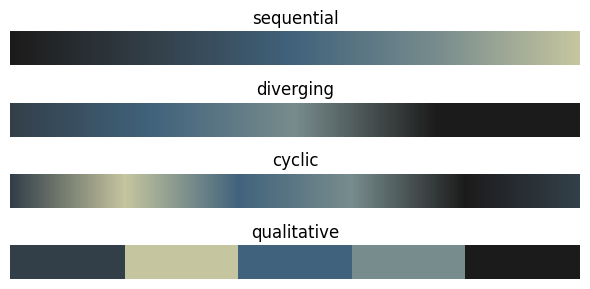

In [4]:
# display all colormaps available
vangogh = Palette(f'images/{fname}')
vangogh.display_all_palettes()

## Examples plots

The function `display_example_plots` applies the generated color map to multiple different plot types & libraries for ease of visualization

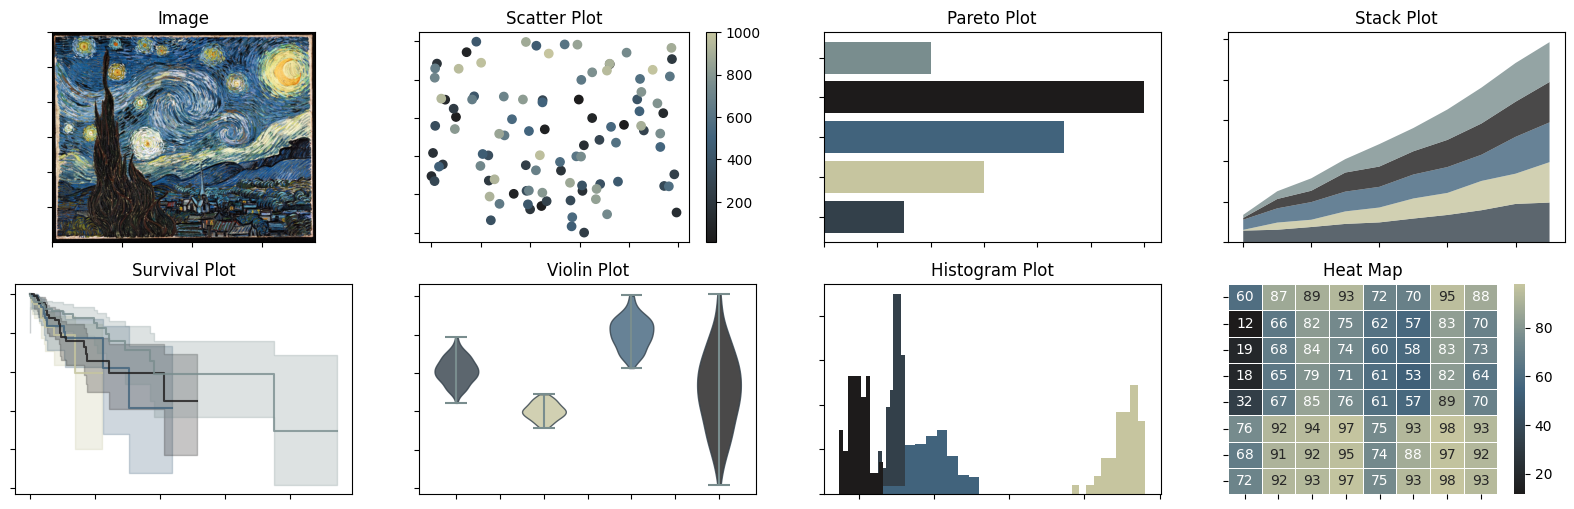

In [5]:
vangogh.display_example_plots()

`palettecleanser` also comes prepackaged with existing custom palettes that can be accessed via. `palettecleanser.custom`

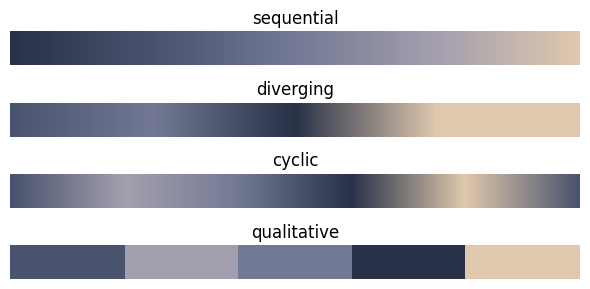

In [6]:
import custom

custom.TwilightSunset.display_all_palettes()

All available custom palettes can be displayed using the `display_all_custom_palettes` method

Generating sequential displays...: 100%|██████████| 10/10 [00:00<00:00, 550.99it/s]


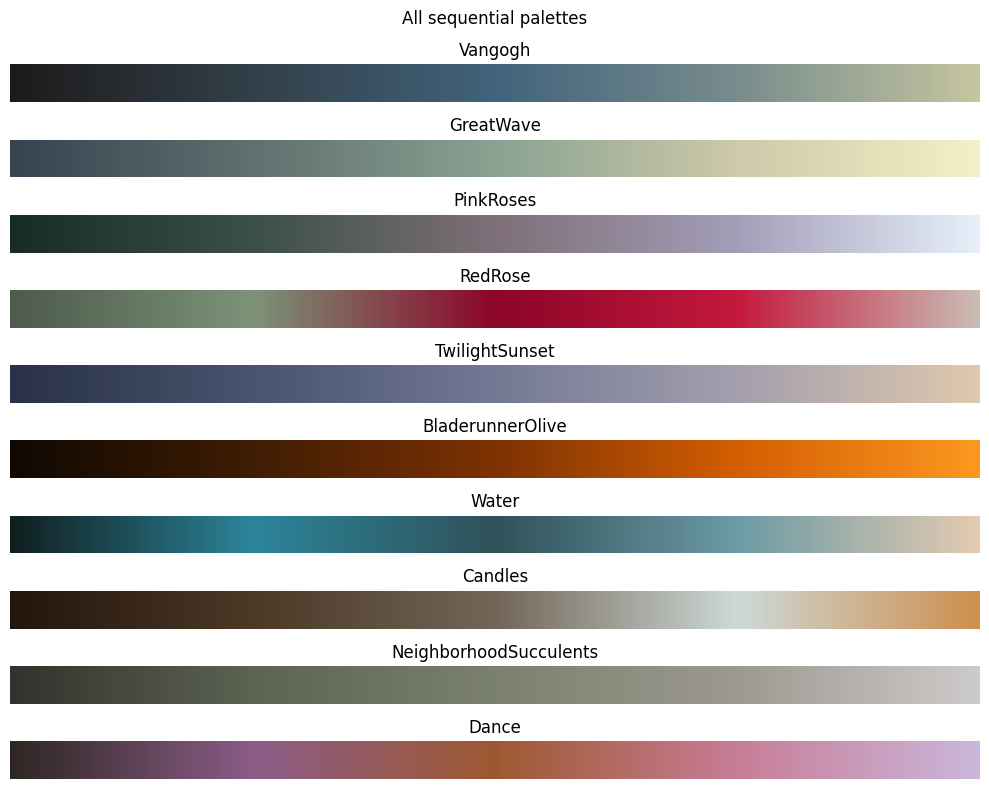

In [7]:
custom.display_all_custom_palettes('sequential')

### matplotlib

Colormaps in `matplotlib` are generally specified via the `color` or `palette` attributes in the plot function call

In [8]:
# this is the entire object that contains all colormaps.
vg = Palette(f'images/{fname}')

# individual palettes can be accessed via the class attributes
sequential_palette = vg.sequential
diverging_palette = vg.diverging
cyclic_palette = vg.cyclic
qualitative_palette = vg.qualitative

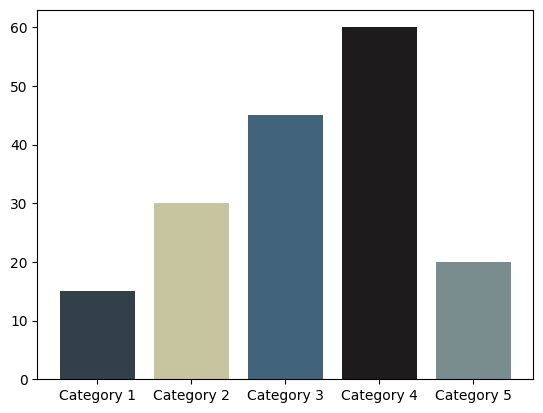

In [9]:
# example bar plot
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values = [15, 30, 45, 60, 20]

# plot using the qualitative palette
plt.bar(categories, values, color=vg.qualitative)
plt.show()

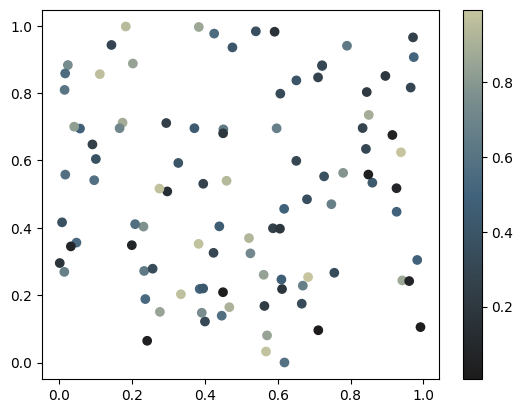

In [10]:
# example scatter plot
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.rand(100) # defining colors based on data range

# plot using the single colormap
plt.scatter(x, y, c=colors, cmap=vg.sequential)
plt.colorbar()
plt.show()

### seaborn

colormaps can be specified in `seaborn` via the `palette` field

In [11]:
# this is the entire palette object containing all colormaps
# for this initialization, we'll init with `n_colors`=6 since later plots can have 6+ categories
vg_6 = Palette(f'images/{fname}', n_colors=6) 

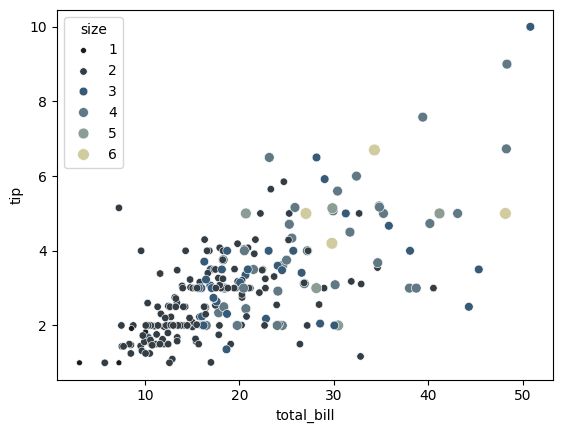

In [12]:
tips = sns.load_dataset('tips')
sns.scatterplot(data=tips, x="total_bill", y="tip", hue='size', size='size', palette=vg_6.sequential)
plt.show()

In this plot below, 10 different categories exist. Initializing the object with `n_colors=10` will serve to make sure each bar has a distinct color. Note that this is contingent on the variety of colors available within the image however

In [13]:
# palette with 10 distinct colors in map
vg_10 = Palette(f'images/{fname}', n_colors=10) 

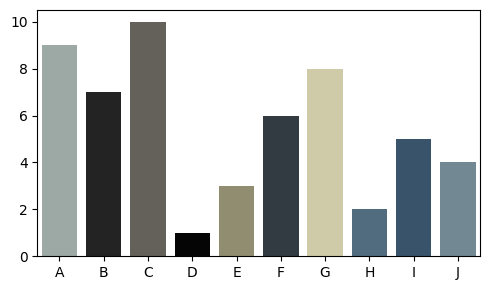

In [14]:
# example bar plot - https://seaborn.pydata.org/examples/palette_choices.html
f, ax = plt.subplots(1, 1, figsize=(5, 3))

rs = np.random.RandomState(8)

x = np.array(list("ABCDEFGHIJ"))
y = rs.choice(np.arange(1, 11), len(x), replace=False)
sns.barplot(x=x, y=y, hue=x, palette=vg_10.qualitative, ax=ax)

plt.tight_layout()

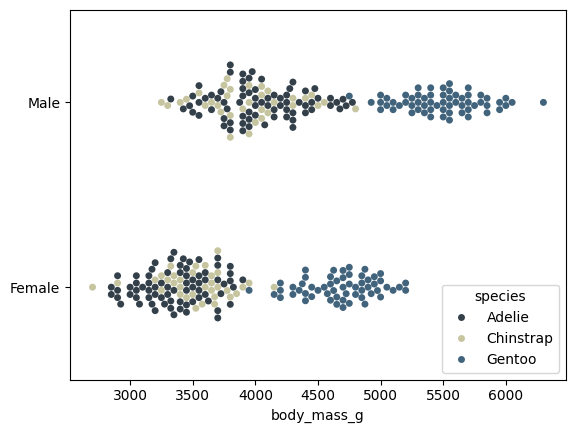

In [15]:
# example scatterplot - https://seaborn.pydata.org/examples/scatterplot_categorical.html

df = sns.load_dataset("penguins")

# draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="body_mass_g", y="sex", hue="species", palette=vg.qualitative)
ax.set(ylabel="")
plt.show()


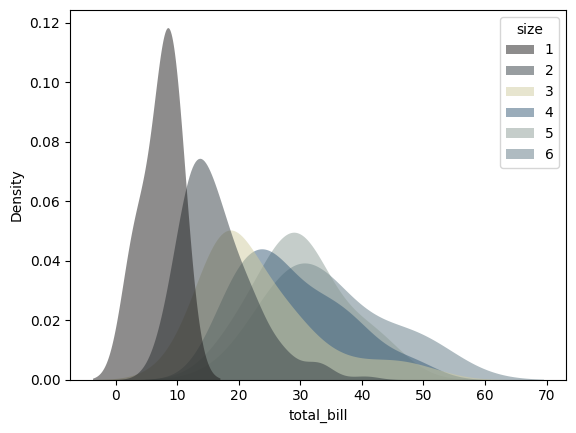

In [16]:
# example KDE plot - https://seaborn.pydata.org/generated/seaborn.kdeplot.html
tips = sns.load_dataset("tips")
sns.kdeplot(
   data=tips, x="total_bill", hue="size",
   fill=True, common_norm=False, palette=vg_6.qualitative,
   alpha=.5, linewidth=0,
)
plt.show()

### Plotly

`plotly` generally uses arguments to the `color_discrete_sequence` or `color_continuous_scale` in order to specify colormaps. By default, `plotly` handles a lot of the backend colormaps parsing on its own, so simply pluggin in the `palette.plotly` colormap available into either field will suffice


In [17]:
# reuse same dataset as `seaborn` example for a continuous color scale
# apply colormap to `color_continuous_scale`
fig = px.scatter(tips, x="total_bill", y="tip", color="tip", color_continuous_scale=vg.plotly)
fig.show()

In [18]:
# discrete color map - apply colormap to `color_discrete_sequence`
fig = px.scatter(tips, x="total_bill", y="tip", color="day", color_discrete_sequence=vg.plotly)
fig.show()

In [19]:
# example bar plot with discrete color sequence
df = px.data.medals_long()
# add some example data to increase color palette
df2 = pd.DataFrame([['Antarctica', 'gold', 10]], columns=['nation','medal','count'])
df3 = pd.DataFrame([['Atlantis', 'bronze', 4]], columns=['nation','medal','count'])

df = pd.concat([df, df2, df3])

fig = px.bar(df, x="medal", y="count", color="nation", color_discrete_sequence=vg.plotly)
fig.show()


In [20]:
import palettes
palettes.compress_image_inplace('images/dance.jpg')

images/dance.jpg compressed - ((790, 1099)) space saved.
